# Group 19 Dataset C

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Initial Data Processing

In [21]:
dataCols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

trainSet = pd.read_csv('adultdata.csv', names = dataCols)
testSet = pd.read_csv('adulttest.csv', names = dataCols)

trainSet = trainSet.dropna()
testSet = testSet.dropna()

print(trainSet.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  
0          2174             0              40   United-States   <=50

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


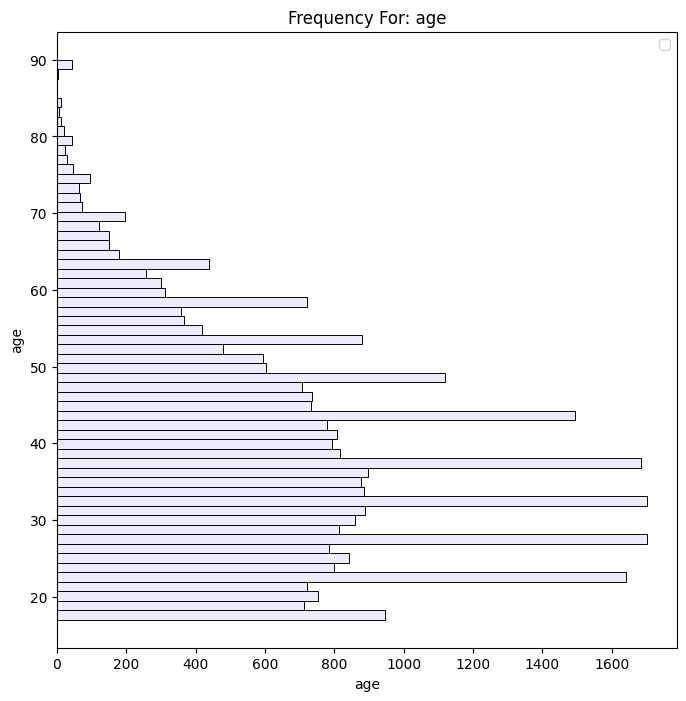

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


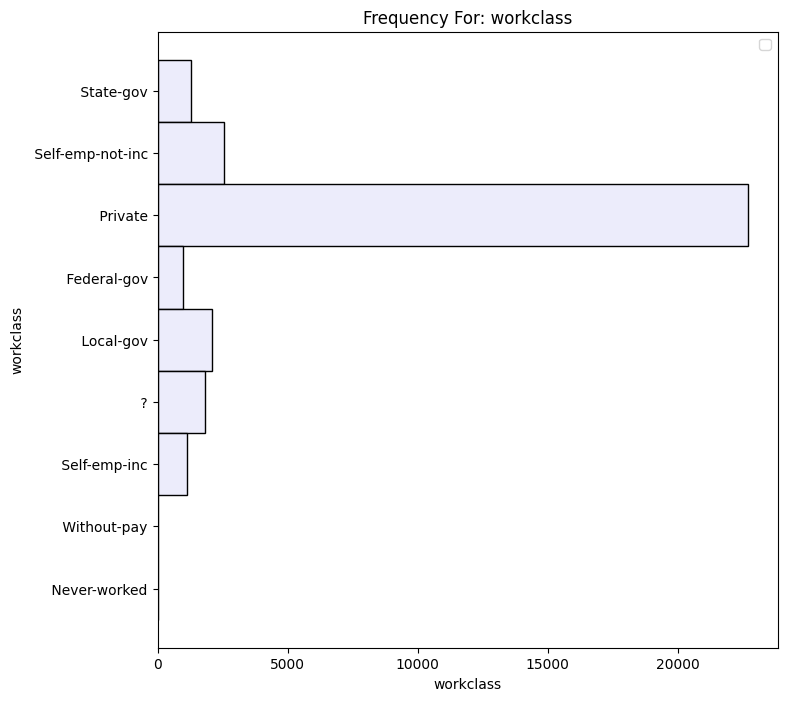

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


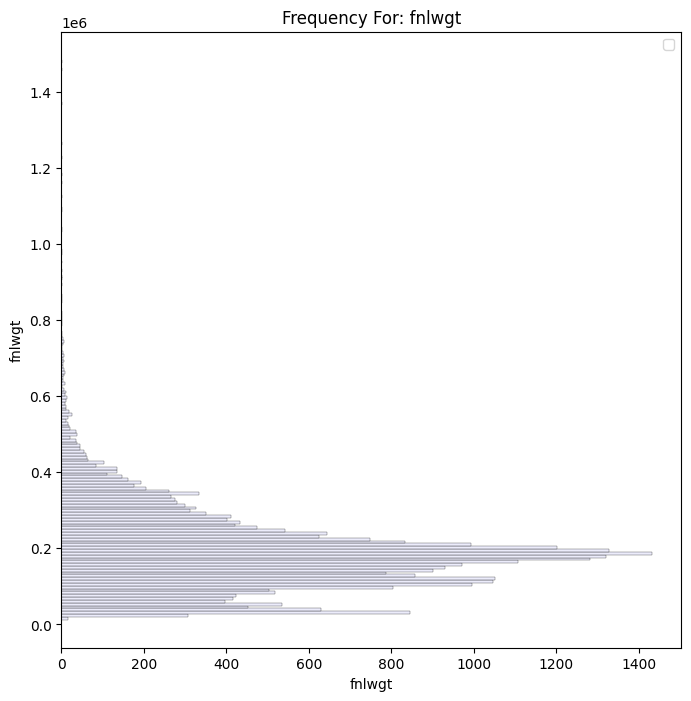

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


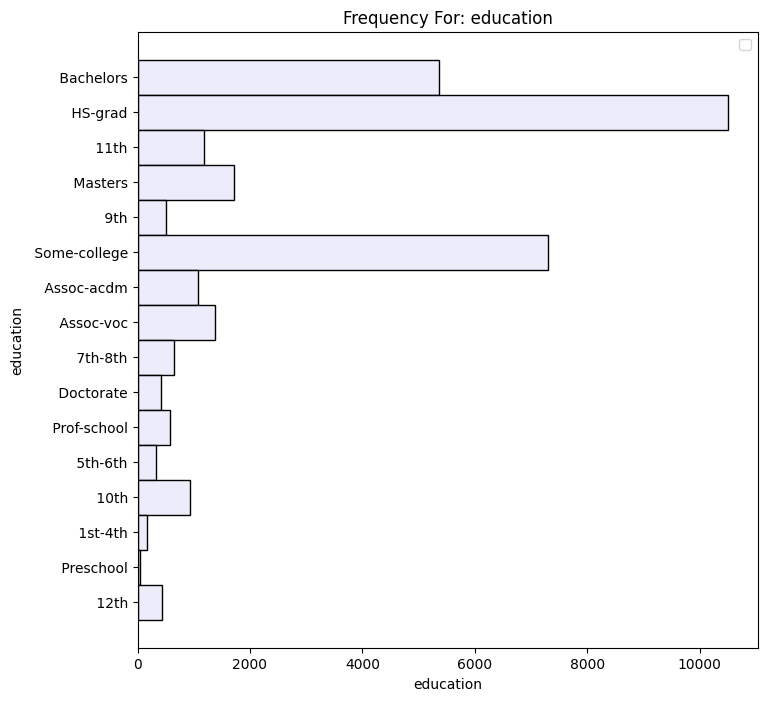

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


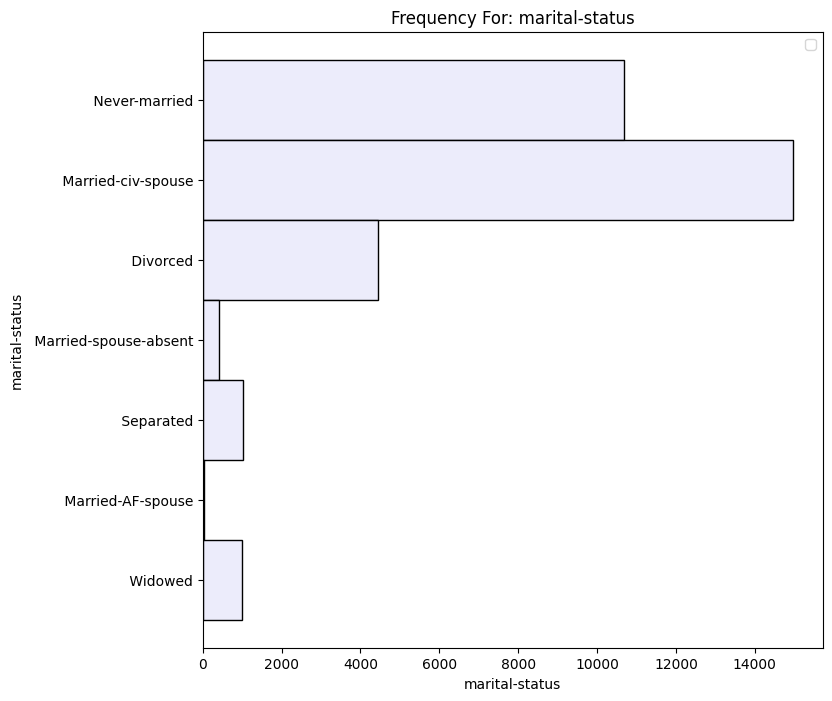

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


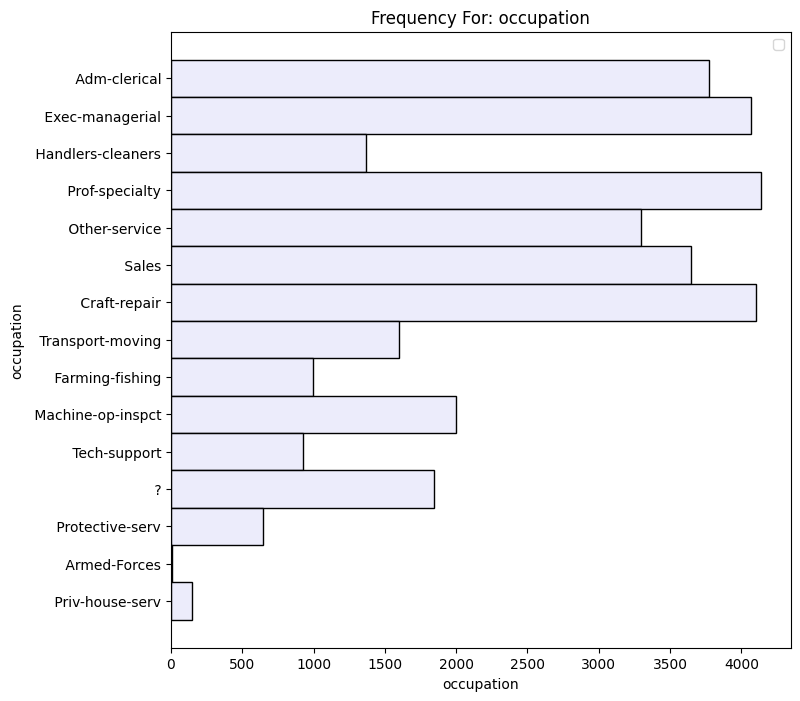

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


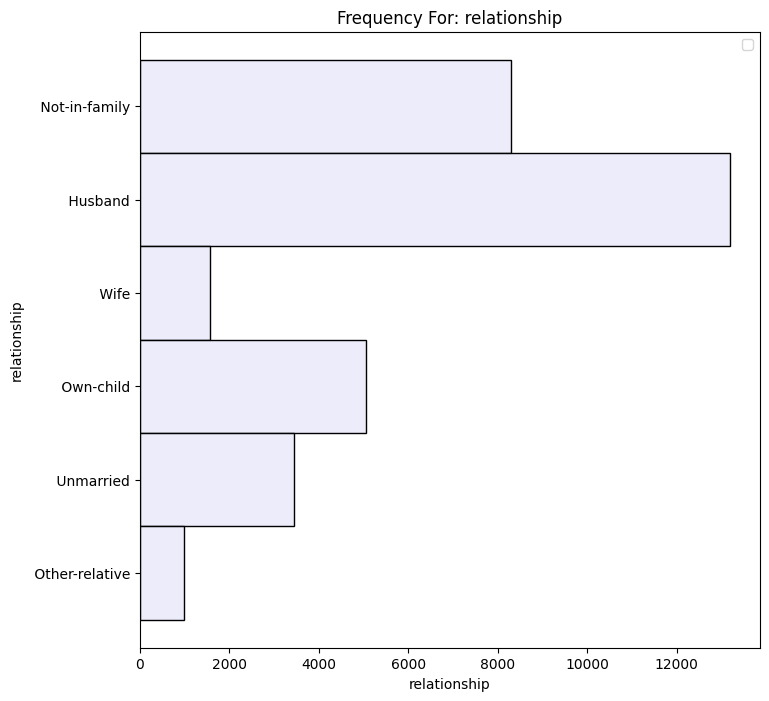

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


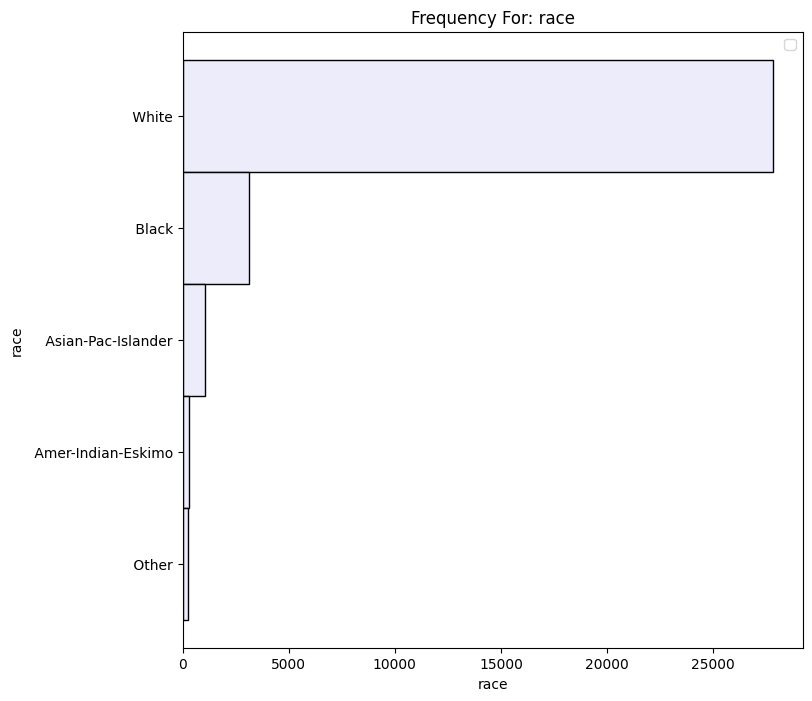

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


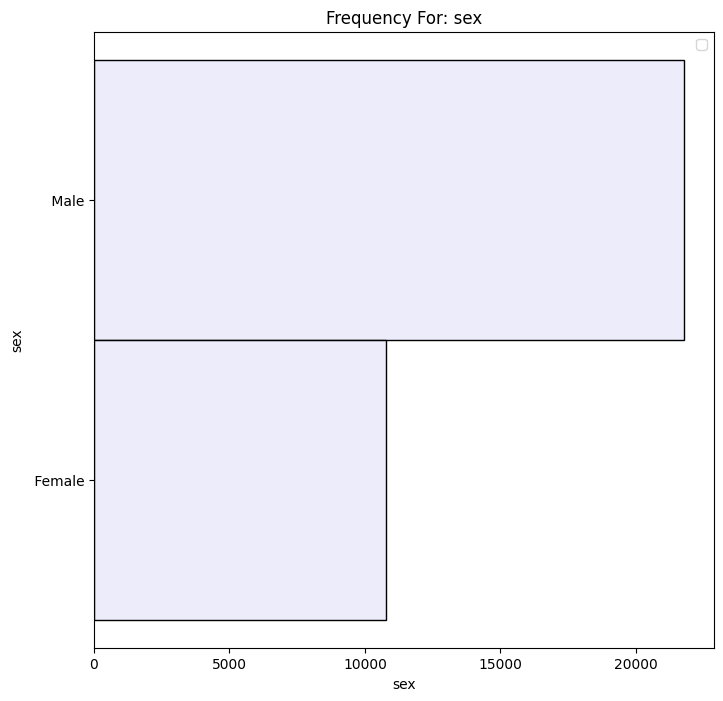

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


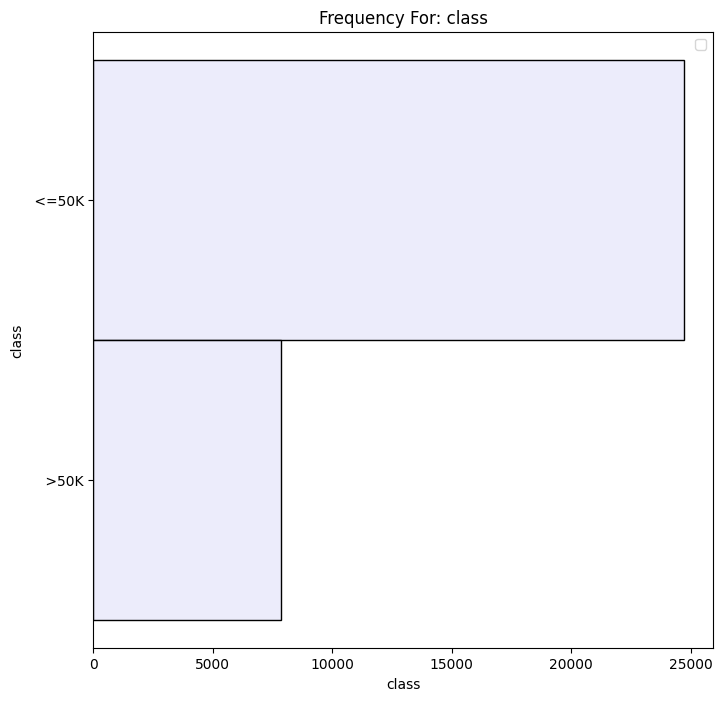

<Figure size 640x480 with 0 Axes>

In [22]:
dataColsShort =  ['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
             'occupation', 'relationship', 'race', 'sex','class']
for cols in dataColsShort:
    plt.figure(figsize = (8, 8))
    sns.histplot(y = trainSet[cols], color = 'lavender')
    plt.xlabel(cols)
    plt.title("Frequency For: " + cols)
    plt.legend()
    plt.show()

plt.tight_layout()

# Encoding Data to be used in the model:
This is turns our non-neumerical into integers that can be used in the model building process

In [23]:
XTrain  = trainSet[['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
YTrain = trainSet['class'].values
XTest  = testSet[['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']]
YTest = testSet['class'].values

XTrainEncode = pd.get_dummies(XTrain, drop_first=True, dtype=int)
XTestEncode = pd.get_dummies(XTest, drop_first=True, dtype=int)

missing_cols = set(XTrainEncode.columns) - set(XTestEncode.columns)
for col in missing_cols:
    XTestEncode[col] = 0

XTestEncode = XTestEncode[XTrainEncode.columns]

print(XTrainEncode.head())
print(XTestEncode.head())

YTest = np.array([y.rstrip('.') for y in YTest])
print(YTest[:5])

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                        0   
3                       0                     0                        0   
4                       0                     0                        0   

   workclass_ Private  workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  \
0                   0                        0                            0   
1                   0                        0                            1   
2                   1                        0                            0   
3                   1                        0                            0   
4                   1                        0                            0   

   workclass_ State-gov  workclass_ Without-pay  education_ 11th  \


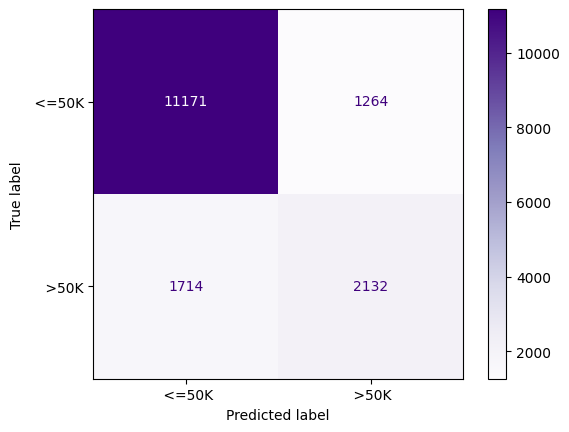

Accuracy:  0.8170874024937044


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


clf = DecisionTreeClassifier(max_depth=None, random_state=0)
clf.fit(XTrainEncode, YTrain)

YPred = clf.predict(XTestEncode)
accuracy = accuracy_score(YPred, YTest)

cm = confusion_matrix(YTest, YPred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

colors = plt.cm.Purples
disp.plot(cmap = colors)
plt.show()
print('Accuracy: ', accuracy)

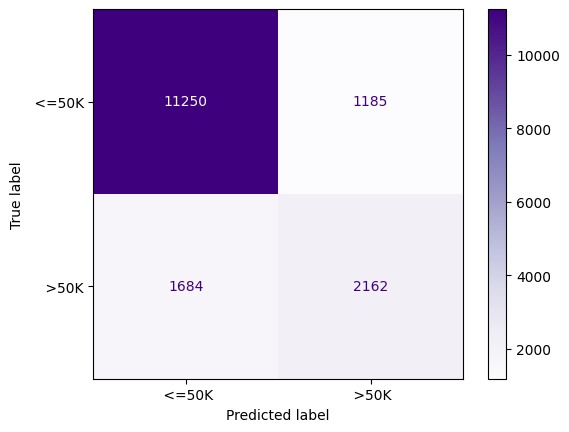

Accuracy: 0.8237823229531356


In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(XTrainEncode, YTrain)

YPred = clf.predict(XTestEncode)
accuracy = accuracy_score(YTest, YPred)

cm = confusion_matrix(YTest, YPred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

colors = plt.cm.Purples
disp.plot(cmap = colors)
plt.show()
print('Accuracy:', accuracy)

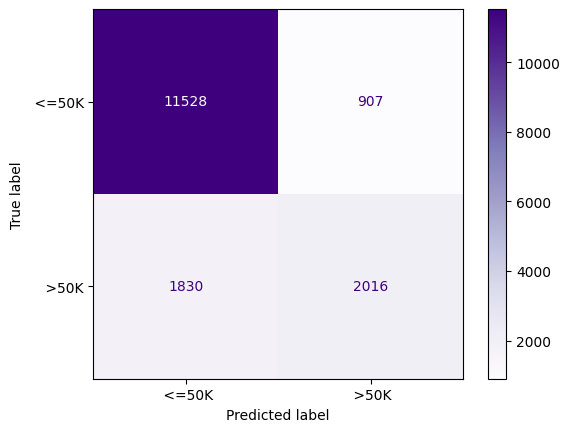

Accuracy 0.8318899330507954


In [26]:
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto'))
clf.fit(XTrainEncode, YTrain)

YPred = clf.predict(XTestEncode)
accuracy = accuracy_score(YTest, YPred)

cm = confusion_matrix(YTest, YPred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

colors = plt.cm.Purples
disp.plot(cmap = colors)
plt.show()
print('Accuracy', accuracy)